# Initial Data Exploration  
The purpose of our initial data exploration is to:
<ol type = "a">
    <li>Check the validity of the data and perform data cleaning methods if needed.</li>
    <li>View the statistical details of the data</li>
    <li>Add additional data from the {cite:t}`ahn2014decision` study as we are interested in clustering unhealthy individuals</li>
    <li>Perform data visualization to improve our understanding of the data</li>
    <li>Feature Engineer</li>
    <li>Perform transformations (standardization, PCA)</li>
</ol>

If you are viewing this as an HTML page, please use the content toolbar to the right for quick access to different sections.

## Importing required libraries 
Data processing

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

Data Visualization 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

For the purposes of this exploration, we load in 12 different csv files. 
|    Type     | File Name |    Description      |
| :------------ | -------------: | :------------ |
|        Choices     |        choices_95.csv, choices_100.csv, choices_150.csv     | These CSV's contains all of the choices made by test-takers during the examined studies. **Note**, the 10 studies described in the Introduction section are grouped by the number of trails. The integer suffix of the file name indicates the number of trails performed. For example, the 1<sup>st</sup> row and 2<sup>nd</sup> column instance of the choices_95.csv file describes a participant's 2<sup>nd</sup> card choice in a 95 trail study.   |    
|     Wins     |      wi_95.csv, wi_100.csv, wi_150.csv      |     These datasets describe the wins received by participants in 95, 100 and 150 trail investigations, as indicated by the suffix. For example, the  3<sup>rd</sup> row and 5<sup>th</sup> column entry of the wi_100.csv file details the monetary gain received by a participant on their 5<sup>th</sup> choice in 100 trail study.     | 
|        Losses    |        lo_95.csv, lo_100.csv, lo_150.csv     |   These files contain the loses received by participants in 95, 100 and 150 trail investigations, as indicated by the suffix. For example, the  2<sup>nd</sup> row and 8<sup>th</sup> column entry of the lo_150.csv file details the monetary penalty received by a participant on their 8<sup>th</sup> choice in 150 trail study.      |        
|     Index     |      index_95.csv, index_100.csv, index_150.csv    | index_95.csv, index_100.csv, and index_150.csv map the first author of the study that reports the data to the corresponding subject. |      

In [5]:
choice_95 = pd.read_csv('data/choice_95.csv')
choice_100 = pd.read_csv('data/choice_100.csv')
choice_150 = pd.read_csv('data/choice_150.csv')

In [6]:
win_95 = pd.read_csv('data/wi_95.csv')
win_100 = pd.read_csv('data/wi_100.csv')
win_150 = pd.read_csv('data/wi_150.csv')

In [7]:
loss_95 = pd.read_csv('data/lo_95.csv')
loss_100 = pd.read_csv('data/lo_100.csv')
loss_150 = pd.read_csv('data/lo_150.csv')

In [8]:
index_95 = pd.read_csv('data/index_95.csv')
index_100 = pd.read_csv('data/index_100.csv')
index_150 = pd.read_csv('data/index_150.csv')

Currently, the dataframes have columns in the following name format: `<Description>_<Trial number>` as indicated down below.

In [9]:
print(f'Win dataframes have the following name format: {", ".join(list(win_100.columns[:3]))}')
print(f'Loss dataframes have the following name format: {", ".join(list(loss_100.columns[:3]))}')
print(f'Choice dataframes have the following name format: {", ".join(list(choice_100.columns[:3]))}')

Win dataframes have the following name format: Wins_1, Wins_2, Wins_3
Loss dataframes have the following name format: Losses_1, Losses_2, Losses_3
Choice dataframes have the following name format: Choice_1, Choice_2, Choice_3


For uniformity, we will replace the column names to have a `Trial_<Trial number>` format as the dataframe variable names already indicates functionality. 

In [10]:
column_names = [f'trial_{num}' for num in range(1,96)]
choice_95.columns = win_95.columns = loss_95.columns = column_names

column_names.extend([f'trial_{num}' for num in range(96,101)])
choice_100.columns = win_100.columns = loss_100.columns = column_names

column_names.extend([f'trial_{num}' for num in range(101,151)])
choice_150.columns = win_150.columns = loss_150.columns = column_names

win_95.head(5)

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10,...,trial_86,trial_87,trial_88,trial_89,trial_90,trial_91,trial_92,trial_93,trial_94,trial_95
Subj_1,100,100,100,100,100,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50
Subj_2,100,100,50,100,100,100,100,100,100,100,...,50,100,100,100,100,100,50,50,50,50
Subj_3,50,50,50,100,100,100,100,100,100,100,...,100,100,100,50,50,50,50,50,50,50
Subj_4,50,50,100,100,100,100,100,50,100,100,...,100,50,50,50,50,50,50,50,50,50
Subj_5,100,100,50,50,50,100,100,100,100,100,...,50,50,50,50,50,50,50,50,50,50


## Data Cleaning  
Check for null values

In [11]:
print(f'Does choice_95 contain any null values? {choice_95.isnull().any().any()}')
print(f'Does choice_100 contain any null values? {choice_100.isnull().any().any()}')
print(f'Does choice_150 contain any null values? {choice_150.isnull().any().any()}')

Does choice_95 contain any null values? False
Does choice_100 contain any null values? False
Does choice_150 contain any null values? False


In [12]:
print(f'Does win_95 contain any null values? {win_95.isnull().any().any()}')
print(f'Does win_100 contain any null values? {win_100.isnull().any().any()}')
print(f'Does win_150 contain any null values? {win_150.isnull().any().any()}')

Does win_95 contain any null values? False
Does win_100 contain any null values? False
Does win_150 contain any null values? False


In [13]:
print(f'Does choice_95 contain any null values? {loss_95.isnull().any().any()}')
print(f'Does choice_100 contain any null values? {loss_100.isnull().any().any()}')
print(f'Does choice_150 contain any null values? {loss_150.isnull().any().any()}')

Does choice_95 contain any null values? False
Does choice_100 contain any null values? False
Does choice_150 contain any null values? False


In [14]:
print(f'Does index_95 contain any null values? {index_95.isnull().values.any()}')
print(f'Does index_100 contain any null values? {index_100.isnull().values.any()}')
print(f'Does index_150 contain any null values? {index_150.isnull().values.any()}')

Does index_95 contain any null values? False
Does index_100 contain any null values? False
Does index_150 contain any null values? False


This finding seems to contradict the original 'many labs' paper. They suggest that their should be missing data present in the 100 trial dataframes due to incompletely received datasets (i.e., missing data for one participant in
Kjome et al. study, and for two participants in Wood et al. study). However, they use the word 'might' so it is possible that this has been rectified since then. I also further validated this assumption by using the R programming language as the organizers provided the datasets in the rdata format. The below screenshot confirms my assumption that no missing values are present.

![absence-of-missing-values-verified-in-r](images/missing_values_verified_in_r.png)


Next, we calculate the basic statistics of each data set. This is a trivial step and it is designed to increase my understanding of the problem.

In [15]:
# choice dataframes
for trial_num in [95, 100, 150]:
    print(f'choice_{trial_num} basic statistics')
    print(globals()[f'choice_{trial_num}'].describe().iloc[:,:6])
    print('\n')

choice_95 basic statistics
         trial_1    trial_2    trial_3    trial_4    trial_5    trial_6
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000
mean    2.133333   2.333333   2.466667   2.600000   2.533333   2.133333
std     1.355764   0.816497   1.060099   1.183216   1.125463   0.990430
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000
25%     1.000000   2.000000   1.500000   2.000000   2.000000   1.500000
50%     1.000000   2.000000   3.000000   2.000000   2.000000   2.000000
75%     3.500000   2.500000   3.000000   4.000000   3.500000   2.500000
max     4.000000   4.000000   4.000000   4.000000   4.000000   4.000000


choice_100 basic statistics
          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000
mean     2.142857    2.416667    2.337302    2.434524    2.281746    2.337302
std      1.099172    1.092628    1.090952    1.138377    1.09

In [16]:
# win dataframes
for trial_num in [95, 100, 150]:
    print(f'win_{trial_num} basic statistics')
    print(globals()[f'win_{trial_num}'].describe().iloc[:,:6])
    print('\n')

win_95 basic statistics
          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count   15.000000   15.000000   15.000000   15.000000   15.000000   15.000000
mean    80.000000   86.666667   70.000000   76.666667   76.666667   86.666667
std     25.354628   22.886885   25.354628   25.819889   25.819889   22.886885
min     50.000000   50.000000   50.000000   50.000000   50.000000   50.000000
25%     50.000000   75.000000   50.000000   50.000000   50.000000   75.000000
50%    100.000000  100.000000   50.000000  100.000000  100.000000  100.000000
75%    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000


win_100 basic statistics
          trial_1     trial_2     trial_3     trial_4     trial_5     trial_6
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000
mean    81.646825   77.956349   76.636905   77.172619   81.369048   80.724206
std     24.12

In [17]:
# loss dataframes
for trial_num in [95, 100, 150]:
    print(f'loss_{trial_num} basic statistics')
    print(globals()[f'loss_{trial_num}'].describe().iloc[:,:6])
    print('\n')

loss_95 basic statistics
       trial_1  trial_2    trial_3  trial_4     trial_5  trial_6
count     15.0     15.0  15.000000     15.0   15.000000     15.0
mean       0.0      0.0  -3.333333      0.0  -20.000000      0.0
std        0.0      0.0  12.909944      0.0   52.779866      0.0
min        0.0      0.0 -50.000000      0.0 -150.000000      0.0
25%        0.0      0.0   0.000000      0.0    0.000000      0.0
50%        0.0      0.0   0.000000      0.0    0.000000      0.0
75%        0.0      0.0   0.000000      0.0    0.000000      0.0
max        0.0      0.0   0.000000      0.0    0.000000      0.0


loss_100 basic statistics
           trial_1      trial_2      trial_3      trial_4      trial_5  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean    -37.301587   -40.376984   -64.682540   -39.384921   -49.107143   
std     149.610031   175.942949   192.871723   152.257429   157.402488   
min   -1250.000000 -1250.000000 -1250.000000 -1250.000000 -1250.00

### Data Augmentation

We are interested in how healthy vs unhealthy individuals will cluster. To this end, we include data from a study conducted by {cite:t}`ahn2014decision`. This dataset contains 48 healthy controls, 43 pure heroin and 38 pure amphetamine users.

Now, we perform the necessary processing steps  to 'pivot' the new data so that it  resembles the already created dataframes. Unfortunately not every subject had data present for all of the 100 trials. If a subject had incomplete data, they were removed from this investigation. As a result, we removed 1 healthy individual, 1 individual who takes heroin and 2 individuals who take amphetamine.

In [18]:
def remove_incomplete_subjects(ahn_df):
    """
    If a subject does not have data for ALL 100 trials
        remove them
    :param ahn_df: pandas dataframe in a format devised
        by Ahn et al.
    """
    for subject in  ahn_df["subjID"].unique():
        subject_df = ahn_df[ahn_df["subjID"] == subject]
        if subject_df['trial'].values.tolist() != list(range(1,101)):
            ahn_df = ahn_df[ahn_df["subjID"] != subject]
    return ahn_df

In [19]:
ahn_healthy_100 = pd.read_csv('data/IGTdata_healthy_control.txt', sep="\t")
ahn_heroin_100 = pd.read_csv('data/IGTdata_heroin.txt', sep="\t")
ahn_amphetamine_100 = pd.read_csv('data/IGTdata_amphetamine.txt', sep="\t")

ahn_healthy_100 = remove_incomplete_subjects(ahn_healthy_100)
ahn_heroin_100 = remove_incomplete_subjects(ahn_heroin_100)
ahn_amphetamine_100 = remove_incomplete_subjects(ahn_amphetamine_100)

assert ahn_healthy_100["subjID"].nunique() == 47
assert ahn_heroin_100["subjID"].nunique() == 42
assert ahn_amphetamine_100["subjID"].nunique() == 36


Down below, we define two helper functions that pivot and concat data.

In [20]:
def pivot_ahn_to_many_labs(org_df, health_status, selection_type):
    """
    Pivots a dataframe present in format devised by Ahn et al. to
    one devised by the authors of the many labs initiative
    
    :param org_dataframe: pandas dataframe in a format devised
        by Ahn et al.
    :param health_status: a variable detailing whether the subject is
        healthy, or takes heroin/amphetamine.
    :param selection_type: selection type decides do we want choices, 
        wins or losses of the particpants.
        options:
            deck -> choices
            gain -> wins
            losses -> losses
    """
    new_dataframe = org_df.pivot(
        index='subjID', columns='trial').rename_axis(None, axis=0)[selection_type].rename_axis(None, axis=1)
    new_dataframe = new_dataframe.add_prefix('trial_')
    new_dataframe.insert(0,'health status', health_status)
    new_dataframe.insert(0,'study','Ahn')
    return new_dataframe
    

In [21]:
def concat_ahn_to_many_labs( many_labs_df, ahn_healthy_df, ahn_heroin_df, ahn_amphetamine_df):
    """
    Concats a 100 trial 'many labs' dataframe with the dataframes provided by Ahn et al.
    Also, maps the health status('healthy') and the study's first author to each particpant 
        of a many labs dataset.
    
    :param many_labs_df: Dataframe containing data from the many labs paper
    :param ahn_healthy_df: Contains the healthy individuals of the Ahn et al study
    :param ahn_heroin_df: Contains the individuals who take heroin (Ahn et al. study)
    :param ahn_heroin_df: Contains the individuals who take amphetamines (Ahn et al, study)
    """
    many_labs_df.insert(0,'health status', 'healthy')
    many_labs_df.insert(0, 'study', index_100['Study'].values)
    concated_df = pd.concat([
        many_labs_df, ahn_healthy_df, ahn_heroin_df, ahn_amphetamine_df
            ], ignore_index=True)
    
    return concated_df


Next, we pivot the Ahn et al. data so that it follows the many labs format i.e. split by choice, win or loss.
The variable name of the pivoted datasets have the form:
-   `ahn_{health_status}_{selection_type}_100`

In [22]:
ahn_healthy_choice_100 = pivot_ahn_to_many_labs(ahn_healthy_100, 'healthy', 'deck')
ahn_heroin_choice_100 = pivot_ahn_to_many_labs(ahn_heroin_100, 'heroin', 'deck')
ahn_amphetamine_choice_100 = pivot_ahn_to_many_labs(ahn_amphetamine_100, 'amphetamine', 'deck')

ahn_healthy_win_100 = pivot_ahn_to_many_labs(ahn_healthy_100, 'healthy', 'gain')
ahn_heroin_win_100 = pivot_ahn_to_many_labs(ahn_heroin_100, 'heroin', 'gain')
ahn_amphetamine_win_100 = pivot_ahn_to_many_labs(ahn_amphetamine_100, 'amphetamine', 'gain')

ahn_healthy_loss_100 = pivot_ahn_to_many_labs(ahn_healthy_100, 'healthy', 'loss')
ahn_heroin_loss_100 = pivot_ahn_to_many_labs(ahn_heroin_100, 'heroin', 'loss')
ahn_amphetamine_loss_100 = pivot_ahn_to_many_labs(ahn_amphetamine_100, 'amphetamine', 'loss')

ahn_healthy_choice_100.head(5)

,study,health status,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,...,trial_91,trial_92,trial_93,trial_94,trial_95,trial_96,trial_97,trial_98,trial_99,trial_100
103,Ahn,healthy,3,3,3,4,3,1,1,2,...,4,4,4,4,4,4,4,4,4,4
104,Ahn,healthy,1,2,3,4,2,3,1,1,...,2,4,4,2,4,2,4,2,4,2
114,Ahn,healthy,2,1,2,4,4,2,2,1,...,4,2,4,4,2,2,4,2,4,4
115,Ahn,healthy,1,3,3,4,3,4,2,4,...,1,4,4,4,3,1,3,4,4,3
116,Ahn,healthy,3,2,1,4,4,3,2,1,...,3,3,1,1,2,3,3,4,2,2


We concat the many_labs dataframe with the dataframes provided by Ahn et al. for each type (i.e. choice, win or loss).

In [23]:
total_choice_100 = concat_ahn_to_many_labs(choice_100,ahn_healthy_choice_100, ahn_heroin_choice_100, ahn_amphetamine_choice_100)
total_win_100 = concat_ahn_to_many_labs(win_100,ahn_healthy_win_100, ahn_heroin_win_100, ahn_amphetamine_win_100)
total_loss_100 = concat_ahn_to_many_labs(loss_100,ahn_healthy_loss_100, ahn_heroin_loss_100, ahn_amphetamine_loss_100)
total_choice_100.head(5)

,study,health status,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,...,trial_91,trial_92,trial_93,trial_94,trial_95,trial_96,trial_97,trial_98,trial_99,trial_100
0,Horstmann,healthy,1,1,2,4,3,2,1,2,...,1,1,1,2,2,2,4,2,4,2
1,Horstmann,healthy,2,1,4,4,3,2,3,2,...,4,2,3,4,2,4,4,2,2,4
2,Horstmann,healthy,4,2,3,1,4,2,4,4,...,3,2,1,4,2,2,2,4,2,2
3,Horstmann,healthy,4,3,4,2,1,4,3,2,...,4,2,3,4,3,4,1,4,3,4
4,Horstmann,healthy,1,2,2,2,2,3,4,1,...,2,2,2,2,3,3,3,3,4,4


The next two cells map the health status('healthy') and study's first author to each subject in the 95 and 150 trial studies. **Note**, this was completed for 100 trial studies above in the `pivot_ahn_to_many_labs()` function .


In [24]:
choice_95.insert(0,'health status', 'healthy')
choice_95.insert(0, 'study', index_95['Study'].values)
win_95.insert(0,'health status', 'healthy')
win_95.insert(0, 'study', index_95['Study'].values)
loss_95.insert(0,'health status', 'healthy')
loss_95.insert(0, 'study', index_95['Study'].values)

In [25]:
choice_150.insert(0,'health status', 'healthy')
choice_150.insert(0, 'study', index_150['Study'].values)
win_150.insert(0,'health status', 'healthy')
win_150.insert(0, 'study', index_150['Study'].values)
loss_150.insert(0,'health status', 'healthy')
loss_150.insert(0, 'study', index_150['Study'].values)

Cumulative reward is commonly used to evaluate reinforcement learning models (RLM). This metric stems form the idea on how humans learn through interaction. RLMs attempt to be a computational approach of the same mechanism:
- A agent receives state $S_{0}$ from the environment (In this case, the agent received the four decks of cards, "untouched").
- Based on the $S_{0}$, the agent takes an action $A_{0}$  (our agent will pick a card from deck A, B, C, or D).
- Environment transitions to a new state $S_{1}$ (our agent is present with the same deck of cards, albeit their first choice absent).
- Environment  gives some reward $R_{1}$ to the agent.

Therefore, Cumulative reward at trial t can be defined as:
$$
G(t) = \sum_{k=0}^T R_{t+k+1}
$$ 


In the same respect, we  attempt to plot the cumulative reward (total) for the participants surveyed. However, given the large number of participants available, it is infeasible to plot for every subject. Therefore, we will group participants by study. When plotting, the average cumulative total at trial T for a study of N participants will be calculated as follows:

$$
\frac{1}{N} \sum_{n=1}^N\sum_{t=1}^T (W + L)_{t}
$$
Where W denotes the win and L denotes the loss. W is a positive integer number whilst L is a negative integer.

The next few code cells perform the data processing steps required to produce the visualizations. Asserts are used to test that the transformation has been performed correctly. 

In [26]:
def get_cumulative_reward(win_df, loss_df):
    """
    Retrives the cumulative reward dataframe for each subject of a study.
    Also, sets a globals 'rewards' variable which
        holds the reward at each trial for every subject of a study.
    :param win_df: contain the wins received by participants
    :param loss_df: contain the loses received by participants
    """
    trial_num = len(win_df.columns.values) - 2
    # Set a 'reward global variable', used later on in PCA 
    globals()[f'rewards_{trial_num}'] = win_df.iloc[:,2:].add(loss_df.iloc[:,2:])
    cum_reward = globals()[f'rewards_{trial_num}'].cumsum(axis=1)
    cum_reward = pd.merge(
        win_df.iloc[:,:2], cum_reward, left_index=True, right_index=True
        )
    globals()[f'rewards_{trial_num}'].insert(0,'health status', win_df.iloc[:,1])
    globals()[f'rewards_{trial_num}'].insert(0, 'study', win_df.iloc[:,0])

    return cum_reward


In [27]:

cum_reward_95 = get_cumulative_reward(win_95,loss_95)
assert cum_reward_95.iloc[0,10] == -350
assert cum_reward_95.iloc[11, 8] ==  500
assert cum_reward_95.iloc[8,69] == -450

cum_reward_100 = get_cumulative_reward(total_win_100, total_loss_100)
assert cum_reward_100.iloc[3, 11] == -1000
assert cum_reward_100.iloc[499, 100] == 25
assert cum_reward_100.iloc[2, 94] == -1050 

cum_reward_150 = get_cumulative_reward(win_150, loss_150)
assert cum_reward_150.iloc[4,144] == 1800
assert cum_reward_150.iloc[93, 10] == 300

In [28]:
def visualize_cumulative_reward_by_study(cum_reward_df):
    """
    visualize the cumulative reward dataframe grouped by  study.
    :param cum_reward_df: contain the cumulative rewards by participants in 'X' trial studies
        where 'X' can be 95,100 and 150
    """
    sum_cum_reward_df = cum_reward_df.groupby(['study']).sum()
    trial_num = len(sum_cum_reward_df.columns.values)
    sum_cum_reward_df = sum_cum_reward_df.div(trial_num)


    sns.set(style='darkgrid')
    for study in sum_cum_reward_df.index:
        end_value, colour = sum_cum_reward_df[f'trial_{trial_num}'].loc[study], 'red'
        if end_value > 0:
            colour ='green'
        fig = sns.lineplot(
            x=list(range(1, trial_num + 1)), y =sum_cum_reward_df.loc[study].values.tolist(), color=colour
                )
        plt.xlabel("Trials")
        plt.ylabel("Culmatative reward ($)")
        plt.title(f"{''.join(study)} study ({trial_num} trials, {len(cum_reward_df[cum_reward_df['study'] == study])} participants)")
        plt.show(fig)

Visualizations of the **average sum** of the **cumulative** rewards, grouped by a 'many labs' study. Note, a green line indicates a positive end value where as a red line indicates a negative end value i.e. take home pay. Initially,we concluded that some data transformations incorrectly as our pre-conceptions were not met but ad-hoc analysis revealed no errors. However as {cite:t}`bull2015decision` notes "researchers have observed high inter-study and inter-individual variability in IGT performance in healthy participants.". According to {cite:p}`bechara1994insensitivity`.  healthy subjects should gradually learn to choose an approximately equal number of cards from decks C and D and avoid cards from decks A and B, assuming that they focus on the long-term monetary outcome i.e. the largest take home award . Although `Steingroever2011` and `Wetzel` follow this trend, the other studies do not. This confirms our hypothesis that healthy subjects do not exclusively focus on the long-term outcome. Instead, subjects predominantly consider a combination of gain and loss frequency choices and may be influenced by psychological differences such as impulsivity or  propensity to gambling.

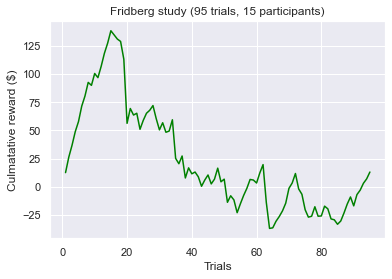

In [29]:
visualize_cumulative_reward_by_study(cum_reward_95)

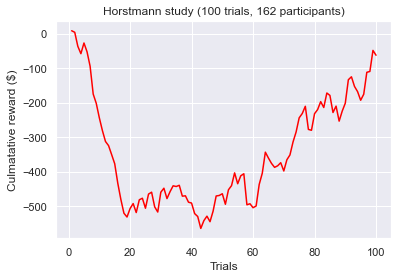

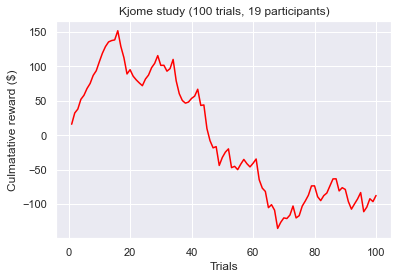

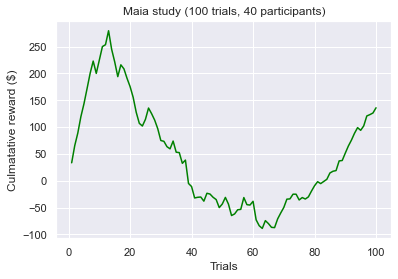

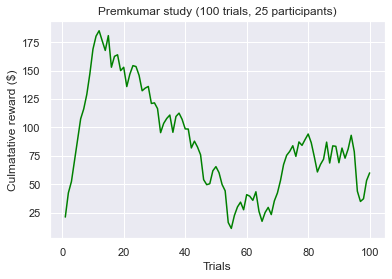

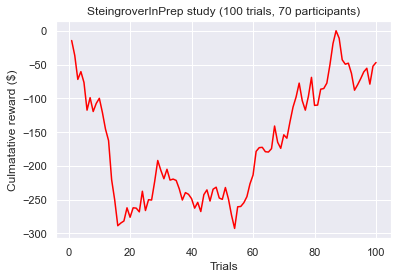

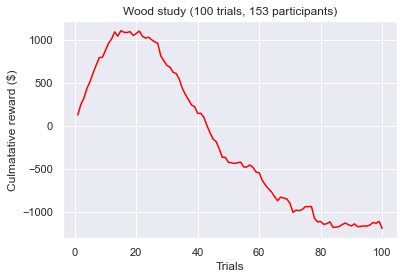

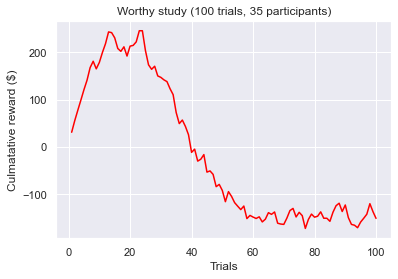

In [30]:
visualize_cumulative_reward_by_study(cum_reward_100[cum_reward_100['study'] != 'Ahn'])

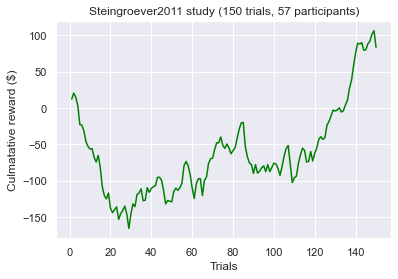

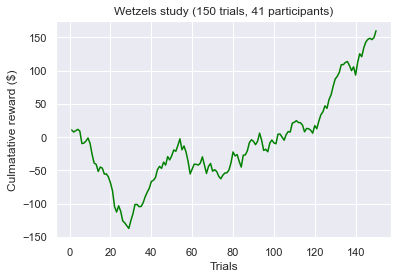

In [31]:
visualize_cumulative_reward_by_study(cum_reward_150)

A common held belief is that people who suffer from subsistence issues exhibit decision-making deficits. 
These results seem to confirm this as we observed the second lowest average cumulative reward at the end trial (i.e take home award). However, although both types of substance users exhibit similar behaviour (i.e. an initial surge followed by a decline by choosing the "bad cards")
the average heroin user tends to perform more poorly when compared to an amphetamine user. Different classes of drugs, such as stimulants and opiates might have different degree of impairment on the decision making progress.  For example, pre-cinical trails conduced by {cite:t}`stewart1984role` describe notable differences between stimulants and opiates, which exert fundamentally different behavioral effects, such that stimulants produce arousing and activating effects, whereas opiates produce mixed inhibitory and excitatory effects. Again, this is a small sample size so results have to be interrupted with caution!

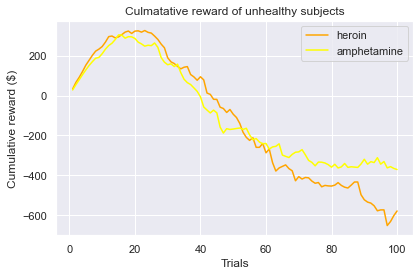

In [32]:
ahn_cum_reward = cum_reward_100[cum_reward_100['study'] == 'Ahn'].groupby(['health status']).sum()
ahn_cum_reward = ahn_cum_reward.div(100)
plt.plot(range(1,101),ahn_cum_reward.loc['heroin'], label='heroin',color='orange')
plt.plot(range(1,101),ahn_cum_reward.loc['amphetamine'], label='amphetamine',color='yellow')
plt.legend()
plt.title('Culmatative reward of unhealthy subjects')
plt.xlabel('Trials')
plt.ylabel('Cumulative reward ($)')
plt.tight_layout()
plt.show()


## Data Processing

If we were to include every feature currently available, we would have high dimensional dataset. K-means suffers from the 'curse of dimensionality' as the distance metric (Euclidean distance) suffers in high dimensions.  Ah-hoc analysis using a dimensailty reduction technique known as principal component analysis (discussed later on) on the 100 trial choice dataset still revealed a high number of relevant components, 36 (Kaiser-Guttman test). This motivates us to perform feature engineering and create the following columns:
- **health_binary:** A binary variable, 1 if the subject is healthy. Otherwise, 0
- **cum_reward_25:** The cumulative reward (as explained above) at trial 25. We include the cumulative reward at specified trial intervals in attempt to model the behaviour/progress of a subject when performing the task. For example, we would expect an individual that has a propensity for gambling to initially achieve well but would loose money overtime as the decks with higher wins ($100) result in a long-term net loss, while the decks with smaller wins ($50) yield a net gain 
- **cum_reward_50:** The cumulative reward at trial 50. 
- **cum_reward_75:** The cumulative reward at trial 57. 
- **cum_reward_100:** The cumulative reward at trial 100. 
- **A:** Count of the number of times card deck A ('bad deck') was picked.
- **B:** Count of the number of times card deck B ('bad deck') was picked.
- **C:** Count of the number of times card deck C ('good deck') was picked.
- **D:** Count of the number of times card deck D ('good deck') was picked.

The performance of the 'healthy' participants on IGT may have been altered by factors that varied across the included studies (e.g. fatigue due to longer trial length). In addition, the card deck count features would be influenced by trial length and could lead to clustering by study rather than my behaviour. (However, this could have ben rectified by scaling) To mitigate against these factors and allow for more accurate comparison, we restrict our investigation to a subset of the available data (many labs + Ahn et al.). This subset contains 8 investigations, 7 that use the classical 100 trials from the 'many labs' paper and the {cite:t}`ahn2014decision` study. This subset includes 629 participants (age range: 18 to 88). Of those 5 studies that had information on gender, 54% were female. 


Engineering the card occurrence columns:

In [72]:
card_choice_df = total_choice_100.iloc[:,2:].apply(pd.Series.value_counts, axis=1)
card_choice_df.columns = ['A','B','C','D']
card_choice_df.head(5)

,A,B,C,D
0,21,42,15,22
1,14,35,18,33
2,21,42,7,30
3,13,24,28,35
4,15,31,28,26


Most popular card decks are B and D. This seems to contradict with the general assumption that healthy participants are only interested in long-term gain.

In [101]:
for deck in card_choice_df.columns:
    print(f'Deck {deck}: {card_choice_df[deck].sum()}')

Deck A: 10103
Deck B: 19372
Deck C: 14762
Deck D: 18663


Engineering the cumulative reward columns:

In [78]:
processed_100 = cum_reward_100[['study','health status', 'trial_25','trial_50','trial_75','trial_100']]
processed_100

,study,health status,trial_25,trial_50,trial_75,trial_100
0,Horstmann,healthy,-250,-550,-800,-1800
1,Horstmann,healthy,150,-400,500,-800
2,Horstmann,healthy,-300,-500,-350,-450
3,Horstmann,healthy,-450,-500,500,1200
4,Horstmann,healthy,-600,-700,150,-1300
...,...,...,...,...,...,...
624,Ahn,amphetamine,1250,190,860,200
625,Ahn,amphetamine,115,-690,-1340,-1815
626,Ahn,amphetamine,300,-505,-2075,-925
627,Ahn,amphetamine,535,-200,-795,-1785


Engineering the healthy binary column:

In [79]:
processed_100['health binary'] = processed_100['health status'].apply(lambda x:  1 if x =='healthy' else 0)

assert processed_100[processed_100['health binary'] == 0].shape[0] == 78



In [80]:
processed_100 = pd.merge(
        processed_100, card_choice_df, left_index=True, right_index=True
        )
processed_100.head(5)


,study,health status,trial_25,trial_50,trial_75,trial_100,health binary,A,B,C,D
0,Horstmann,healthy,-250,-550,-800,-1800,1,21,42,15,22
1,Horstmann,healthy,150,-400,500,-800,1,14,35,18,33
2,Horstmann,healthy,-300,-500,-350,-450,1,21,42,7,30
3,Horstmann,healthy,-450,-500,500,1200,1,13,24,28,35
4,Horstmann,healthy,-600,-700,150,-1300,1,15,31,28,26
...,...,...,...,...,...,...,...,...,...,...,...
624,Ahn,amphetamine,1250,190,860,200,0,15,14,41,30
625,Ahn,amphetamine,115,-690,-1340,-1815,0,24,41,20,15
626,Ahn,amphetamine,300,-505,-2075,-925,0,28,31,22,19
627,Ahn,amphetamine,535,-200,-795,-1785,0,13,32,10,45


## PCA

Although standardization is typically used for features of incomparable units (e.g. height in cm and weight in kg), we will still standardize the choices and rewards due to k-means "isotropic" nature. In this case, if we left our variances unequal;  we would inversely putting more weight on features with high variance. In addition, we will perform <b>principal component analysis</b> due to avoid the curse of dimensionality that k-means can suffer from. The function of PCA is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the data set to the maximum extent. 

The same is done by transforming the variables (i.e. features) to a new set of variables, which are known as the <b>principal components</b>, ordered such that the retention of variation present decreases as we move down the order of components. 


The procedure of PCA involves five steps: <br>
1) Standardise the data <br>
2) Compute covariance matrix <br>
3) Identify the eigenvalues and eigenvectors of the covariance matrix and order them according to the eigenvalues <br>
4) Compute a feature vector <br>
5) Recast the data <br>


#### Standardisation

We now standardize the data using the following formulae:
$$X_i = X_i - \bar{X}~~~~~~~~~~~~~~~~~~X_i = \frac{X_i}{\sigma}$$

The standard deviation should equal 1 after standardization

In [89]:
labeled_processed_100 = processed_100.loc[:,['study', 'health status']]
values_to_be_scaled_processed_100 =  processed_100.iloc[:,2:]
scaled_processed_100  = StandardScaler().fit_transform(values_to_be_scaled_processed_100)

assert np.std(scaled_processed_100) == 1

We will use the `PCA` function supplied by the `Scikit-learn` library for dimensionality reduction.  But how do we find the optimal number of components? Which eigenvalues are important?  The scree plot below describes the cumulative explained variance for each component. We reach 80% explained variance at the 58 component mark.

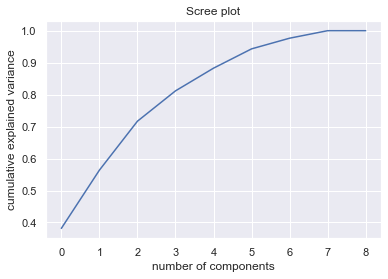

In [90]:
pca = PCA().fit(scaled_processed_100)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot')
plt.show()

According to the average-eigenvalue test (Kaiser-Guttman test) we should retain only those eigenvalues that are above the average which is 1.0. <br>
Jolliffe relaxes this criterium and suggest to retain eigenvalues greater than 0.7. 


In [91]:
kasier_criterion = np.where(pca.explained_variance_ > 1)[-1][-1]
print(
        f'Kasier criterion optimal component number: {kasier_criterion}, explained variance: {np.cumsum(pca.explained_variance_ratio_)[kasier_criterion]}'
    )
jolliffe_criterion = np.where(pca.explained_variance_ > 0.7)[-1][-1]
print(
    f'Jolliffe criterion optimal component number: {jolliffe_criterion} , expalined variance: {np.cumsum(pca.explained_variance_ratio_)[jolliffe_criterion]}'
    )

Kasier criterion optimal component number: 2, explained variance: 0.7168193073625704
Jolliffe criterion optimal component number: 3 , expalined variance: 0.8117508248086707


 For the purpose of this investigation, we decide to go with **both** the Kaiser criterion and Jolaliffe criterion . In addition, 2 principal components (Kasier) account for approx. 71.68% of the explained variance whilst 3 principal components (Jolliffe) account for approx. 81.17% of the explained variance.

Finally, we fit the `pca` model with the dataframes containing top 2 and 3 components , apply the dimensionality reduction on those respective dataframe and save the resulting dataframes.

In [96]:
pca_2d = PCA(n_components=2)
dim_reduced_2d = pca_2d.fit_transform(scaled_processed_100)
dim_reduced_2d = pd.DataFrame(data=dim_reduced_2d, columns=[f'component_{num}' for num in range(1,3)])
dim_reduced_2d = pd.merge(
        labeled_processed_100, dim_reduced_2d, left_index=True, right_index=True
        )
dim_reduced_2d.to_csv("data/dim_reduced_2d.tsv", sep="\t", index=False)
dim_reduced_2d.head(5)

,study,health status,component_1,component_2
0,Horstmann,healthy,-1.703901,0.529617
1,Horstmann,healthy,0.169127,0.714179
2,Horstmann,healthy,-0.913123,1.028506
3,Horstmann,healthy,1.472582,0.978087
4,Horstmann,healthy,-0.267429,0.801555


In [97]:
pca_3d = PCA(n_components=3)
dim_reduced_3d = pca_3d.fit_transform(scaled_processed_100)
dim_reduced_3d = pd.DataFrame(data=dim_reduced_3d, columns=[f'component_{num}' for num in range(1,4)])
dim_reduced_3d = pd.merge(
        labeled_processed_100, dim_reduced_3d, left_index=True, right_index=True
        )
dim_reduced_3d.to_csv("data/dim_reduced_3d.tsv", sep="\t", index=False)
dim_reduced_3d.head(5)

,study,health status,component_1,component_2,component_3
0,Horstmann,healthy,-1.703901,0.529617,0.118642
1,Horstmann,healthy,0.169127,0.714179,-0.240990
2,Horstmann,healthy,-0.913123,1.028506,-0.473166
3,Horstmann,healthy,1.472582,0.978087,0.555986
4,Horstmann,healthy,-0.267429,0.801555,0.819148
